<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/colab_15_4_Gradient%20of%20a%20Two-Dimensional%20Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab Activity 15.4: Computing the Gradient of a Two-Dimensional Function

In this activity you will use Python to determine the gradient of a two dimensional formula.  Below, a simple 2D quadratic function is given as an analogue to the typical quadratic we have been using.  We demonstrate visualizing a 3D function using `matplotlib`.  Along the way, we will determine the gradients using the symbolic computing power of `sympy`.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [ ]:
def f(x, y):
    return x**2 + y**2

In [ ]:
x = y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

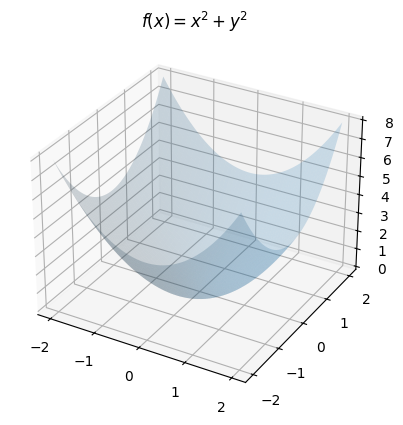

In [ ]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, f(X, Y), alpha = 0.2)
plt.title(r'$f(x) = x^2 + y^2$');

[Back to top](#-Index)

### Problem 1

#### Derivative with respect to $x$ and $y$



Below, we turn to `sympy`, a symbolic computing library, to evaluate the partial derivative with respect to $x$ and $y$.  Note that a maximum or minimum value will occur where both the partial derivative with respect to $x$ and $y$ are equal to zero.  Further, the gradient is the vector formed by these partial derivatives.  

$$\nabla f = <2x, 2y>$$

At what point does this suggest the minimum of $f(x, y) = x^2 + y^2$ lies?  Enter your solution as a tuple $(x, y)$ to `minimum_1`.  

In [ ]:
x, y = sy.symbols('x y')

In [ ]:
#computing the derivative with respect to x
sy.diff(f(x, y), x)

2*x

In [ ]:
#computing the derivative with respect to y
sy.diff(f(x, y), y)

2*y

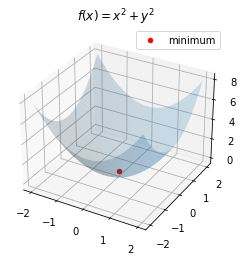

In [ ]:

minimum_1 = (0,0)




### ANSWER CHECK
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, f(X, Y), alpha = 0.2)
ax.scatter3D(minimum_1[0], minimum_1[1], f(minimum_1[0], minimum_1[1]), s = 20, c = 'red', label = 'minimum')
plt.legend()
plt.title(r'$f(x) = x^2 + y^2$');

NOTE:
The minimum of a function occurs where its derivative is equal to 0. In this case, we have a two-dimensional function, so we need to find the point where both partial derivatives with respect to x and y are equal to 0.
2*x = 0
x = 0
2*y =0
y = 0
So the minimum is at (0,0)

[Back to top](#-Index)

### Problem 2

#### Example with Data




Below, we load in the data from our earlier credit example and build the model

$$\hat{y} = \theta_0 X + \theta_1$$

and determine the mean squared error as

$$\frac{1}{n} \sum_{i = 1}^n (\hat{y} - y)^2$$

Use the `LinearRegression` estimator from Scikit-Learn to determine the values for $\theta_0$ and $\theta_1$ that minimize the `mse` function.

In [ ]:
credit = pd.read_csv('data/Credit.csv', index_col=0)
X = credit['Rating'].values
y = credit['Balance'].values

In [ ]:
def mse(theta0, theta1):
  yhat = theta0*X + theta1
  error = y - yhat
  squared_error = np.sum(error**2)
  return 1/(2*X.shape[0]) * squared_error

In [ ]:
mse = np.vectorize(mse)

In [ ]:
theta1 = np.linspace(0, 6, 100)
theta0 = np.linspace(-400, -360, 100)
T1, T0 = np.meshgrid(theta1, theta0)

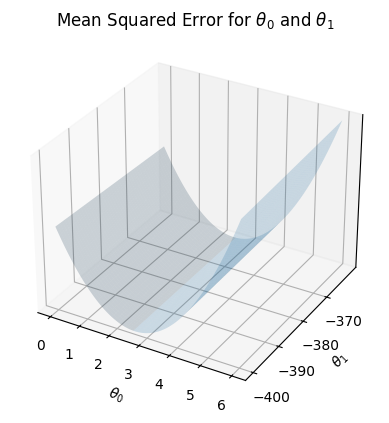

In [ ]:
ax = plt.axes(projection = '3d')
ax.plot_surface(T1, T0, mse(T1, T0), alpha = 0.2)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title(r'Mean Squared Error for $\theta_0$ and $\theta_1$')
ax.set_zticks([])
ax.set_yticks(np.arange(-400, -360, 10));

In [ ]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
best_theta_0 = model.coef_
best_theta_1 = model.intercept_




### ANSWER CHECK
print(f'Equation with optimal parameters: y = {best_theta_0[0]: .2f}x + {best_theta_1: .2f}')

Equation with optimal parameters: y =  2.57x + -390.85
